# Lagrangian patch example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csiborgtools

import scienceplots

%load_ext autoreload
%autoreload 2

In [2]:
paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
bounds = {"dist": (0, 155)}

nsim0 = 9844 - 24 * 5
nsnap_final = paths.get_snapshots(nsim0, "csiborg1")[-1]
snap0_initial = csiborgtools.read.CSiBORG1Snapshot(nsim0, nsnap=1)
cat0 = csiborgtools.read.CSiBORG1Catalogue(nsim0, paths, snapshot=snap0_initial, bounds=bounds)

nsimx = 9844
nsnap_final = paths.get_snapshots(nsimx, "csiborg1")[-1]
snapx_initial = csiborgtools.read.CSiBORG1Snapshot(nsimx, nsnap=1)
catx = csiborgtools.read.CSiBORG1Catalogue(nsimx, paths, snapshot=snapx_initial, bounds=bounds)

pair_overlapper = csiborgtools.summary.PairOverlap(cat0, catx, 13.25, )


FNAME  overlap_09724_09844_13.25.npz
FNAME  overlap_09844_09724_13.25.npz
FNAME  overlap_09724_09844_13.25.npz


In [3]:
k = np.argsort(cat0["totmass"])[::-1][1]

print(np.log10(cat0["totmass"][k]))
print(cat0["dist"][k])

hid0 = cat0["index"][k]


15.431657
95.95069809055808


In [4]:
print("Overlaps are ", pair_overlapper.overlap(True)[k])
hidx = catx["index"][pair_overlapper["match_indxs"][k][0]]

Overlaps are  [7.2361535e-01 2.8234517e-02 2.3738865e-02 3.6706128e-03 3.3552472e-03
 1.9722811e-03 2.3486929e-03 1.5225195e-03 9.7722618e-04 6.2835851e-04
 1.6445392e-04 4.0640763e-04 3.2565400e-05]


In [7]:
overlapper = csiborgtools.match.ParticleOverlap(**{"box_size": 2048, "bckg_halfsize": 512})

pos0_initial = snap0_initial.halo_coordinates(hid0)
pos0_initial = csiborgtools.match.pos2cell(pos0_initial / cat0.boxsize, 2048)
mass0_initial = snap0_initial.halo_masses(hid0)


posx_initial = snapx_initial.halo_coordinates(hidx)
posx_initial = csiborgtools.match.pos2cell(posx_initial / catx.boxsize, 2048)
massx_initial = snapx_initial.halo_masses(hidx)


In [9]:
smooth_kwargs = {"sigma": 1, "mode": "constant", "cval": 0}
# smooth_kwargs = None

delta1_initial, delta2_initial, cellmins, __ = overlapper.make_deltas(
    pos0_initial, posx_initial, mass0_initial, massx_initial, smooth_kwargs=smooth_kwargs, )

x0 = cellmins[0] / 2048 * 677.7
xf = (cellmins[0] + delta1_initial.shape[0]) / 2048 * 677.7

y0 = cellmins[1] / 2048 * 677.7
yf = (cellmins[1] + delta1_initial.shape[1]) / 2048 * 677.7

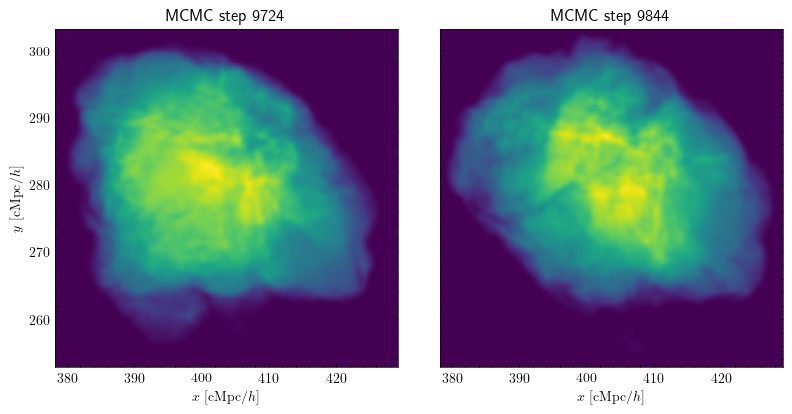

In [10]:
with plt.style.context("science"):
    fig, axs = plt.subplots(1, 2, figsize=(8.3, 8.3 * 0.5), sharey=True, sharex=True)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)

    kwargs = {"origin": "lower", "cmap": "viridis", "vmin": 0, "extent": [x0, xf, y0, yf]}

    axs[0].imshow(np.mean(delta1_initial, axis=-1), **kwargs)
    axs[1].imshow(np.mean(delta2_initial, axis=-1), **kwargs)

    axs[0].set_ylabel(r"$y ~ [\mathrm{cMpc} / h]$")
    for i in range(2):
        axs[i].set_xlabel(r"$x ~ [\mathrm{cMpc} / h]$")

    axs[0].set_title(f"MCMC step {nsim0}")
    axs[1].set_title(f"MCMC step {nsimx}")

    fig.tight_layout()
    fig.savefig("../../plots/lagrangian_patch_example.pdf", bbox_inches="tight", dpi=450)
    fig.show()